# TASK 5 - SALES PREDICTION USING PYTHON

#### Question


Laptop with Browser Icon
Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.



Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

#### Importing necessary libraries

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [ ]:
df = pd.read_csv('/content/Advertising.csv')
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#### Data Preprocessing

In [ ]:

df.shape

(200, 5)

The dataset contains 200 data points and 5 variables in the dataset.

In [ ]:
#Droping irrelevent column
df = df.drop('Unnamed: 0', axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
#checking missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
#summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


The dataset contains 4 numerical variables and the datatype is provided as float64. The memory usage is 6.4 KB



In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


The standard deviation of TV advertising expenditures is relatively high at approximately 85.85. This indicates that the expenditures vary considerably from the mean, suggesting a wide range of spending levels among the observations.

The standard deviation of radio advertising expenditures is about 14.85. This indicates a moderate level of variability around the mean.

The standard deviation of newspaper advertising expenditures is relatively high at about 21.78. This suggests a wide range of spending levels, similar to TV advertising.

The standard deviation of sales is about 5.22, indicating a moderate level of variability around the mean.

The scales of the features (TV, Radio, Newspaper) are quite different. TV advertising spending has a much larger range compared to Radio and Newspaper spending. In such cases, standardization could be beneficial, as it can help ensure that the model gives equal importance to each feature during analysis.

#### Relation between taget variable and feature variables

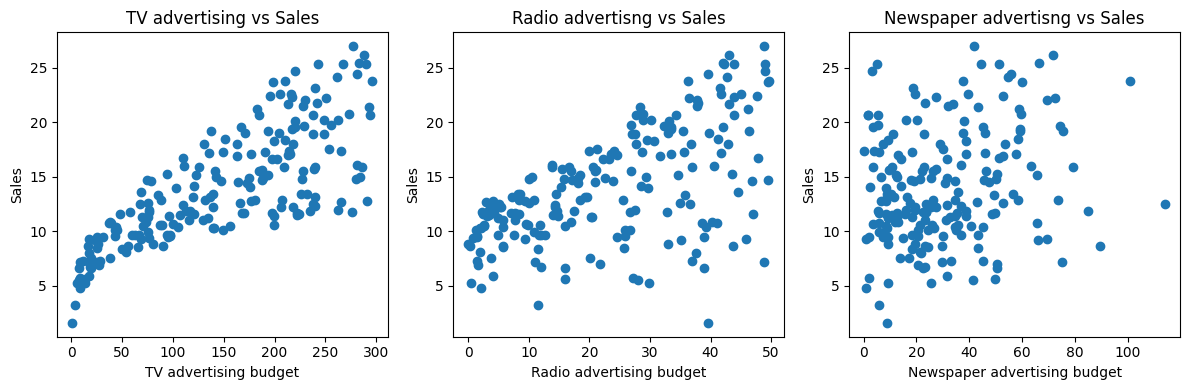

In [ ]:
plt.figure(figsize=(12,4))

# Scatter plot for TV advertising budget vs. Sales
plt.subplot(131)
plt.scatter(df['TV'], df['Sales'])
plt.title('TV advertising vs Sales')
plt.xlabel('TV advertising budget')
plt.ylabel('Sales')

# Scatter plot for Radio advertising budget vs. Sales
plt.subplot(132)
plt.scatter(df['Radio'], df['Sales'])
plt.title('Radio advertisng vs Sales')
plt.xlabel('Radio advertising budget')
plt.ylabel('Sales')

# Scatter plot for Newspaper advertising budget vs. Sales
plt.subplot(133)
plt.scatter(df['Newspaper'], df['Sales'])
plt.title('Newspaper advertisng vs Sales')
plt.xlabel('Newspaper advertising budget')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

A scatterplot shows the relationship between two quantitative variables. From the scatter plot it is quite clear that variables 'TV' and 'Radio' is having linear relationship with the 'Sales'. They are also exhibiting positive relation.

#### Outlier detection

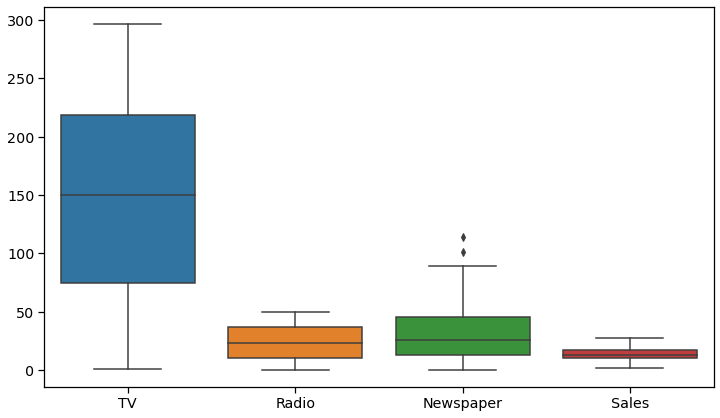

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(data = df)
plt.show()

Outliers are detected in the variable 'Newspaper' from the box plot.

#### Winsorization

In [ ]:
from scipy.stats.mstats import winsorize
# handling outliers using winsorize method
column_to_winsorize = 'Newspaper'
df[column_to_winsorize] = winsorize(df[column_to_winsorize], limits=(0.05, 0.05))

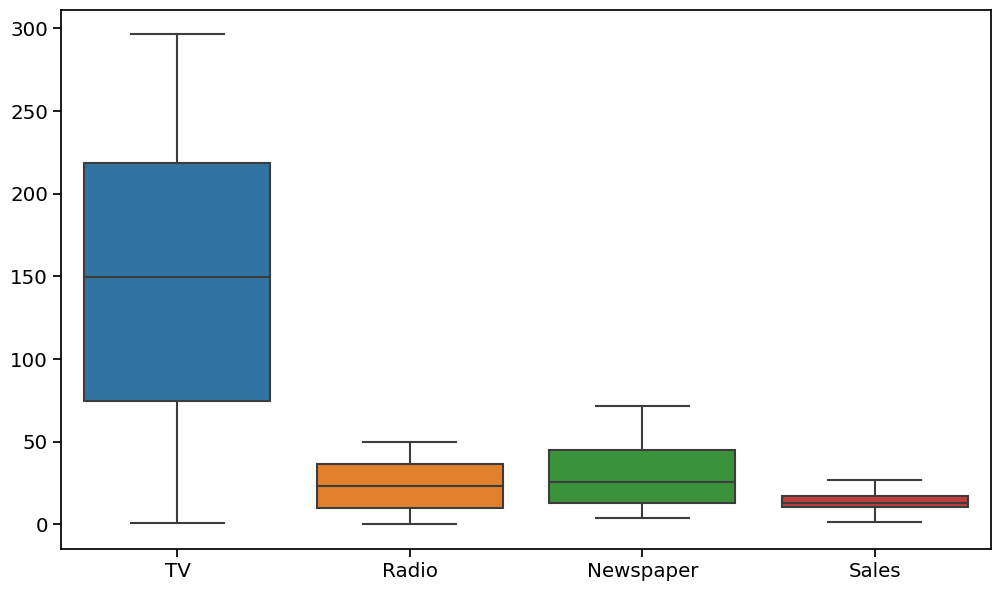

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(data = df)
plt.show()

So the outliers are being treated used winsorization method. Winsorization is a statistical technique used to handle outliers in a dataset by limiting extreme values to be within a specified range.

#### Correlation heatmap

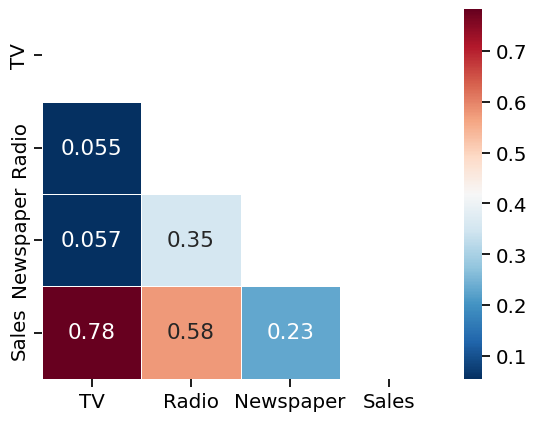

In [ ]:
sns.set_context('notebook', font_scale=1.3)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, cmap='RdBu_r', linewidths=0.5, mask=mask)
plt.show()

There is positive correlation among the variables. A strong positive correlation can be found between 'TV' and 'Sales'. The variables 'Radio' and 'Sales' is having moderate correlation. Other variables exhibit weak correlation.  

#### Determining target variable and feature variable

In [ ]:
# X is the feature variable
X = df.drop('Sales', axis=1)

TV, Radio, Newspapers are the independent variables.

In [ ]:
# y is the target variable
y = df['Sales']

Sales is the dependent variable.

#### Splitting the dataset into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### Standardizing

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['TV', 'Radio', 'Newspaper', 'Sales']
df[cols] = scaler.fit_transform(df[cols])
df.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.955484,1.552053
1,-1.197376,1.082808,0.752217,-0.696046
2,-1.516155,1.528463,1.960477,-0.907406
3,0.052050,1.217855,1.421253,0.860330
4,0.394182,-0.841614,1.416261,-0.215683


#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [ ]:
pd.DataFrame({'Actual_y': y_test,'Predicted_y':y_pred_linear })

,Actual_y,Predicted_y
95,16.9,16.572124
15,22.4,21.196014
30,21.4,21.558759
158,7.3,10.890762
128,24.7,22.202849
115,12.6,13.360198
69,22.3,21.199615
170,8.4,7.346498
174,11.5,13.274532
45,14.9,15.126730


#### Evaluation of Linear Regression model

In [ ]:
# Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred_linear,squared=False)
MSE

1.9395548328970966

Mean Squared Error (MSE) calculates the average of the squared differences between predicted values and actual values. Smaller MSE values indicate better model performance.

In [ ]:
# Calculate the Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
RMSE

1.3926790128730657

In [ ]:
# Calculate the Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred_linear)
MAE

1.5035596259580652

Here Mean absolute error is 1.50 which is a lower values indicate better model performance.

In [ ]:
# Calculate the coefficient of determination (R-squared)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_linear)
print("R-squared:", r2)

R-squared: 0.8622257128214504


A higher R² indicates a better fit of the model to the data. Here, 86% of variations in target variable is explained by the independent variables.

#### Regression Plot

<function matplotlib.pyplot.show(close=None, block=None)>

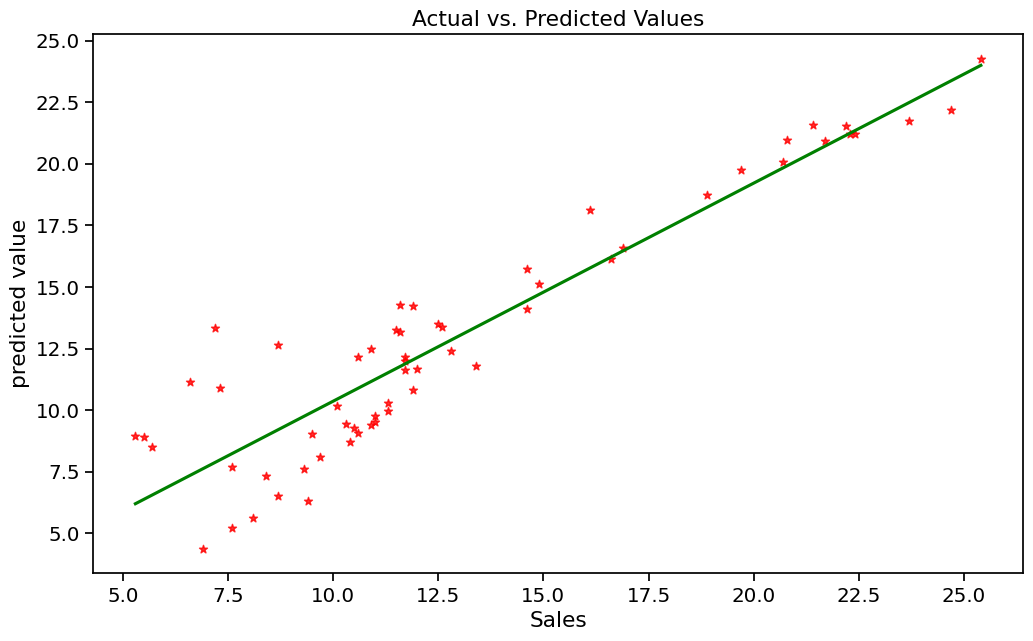

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("Actual value")
plt.ylabel("predicted value")
plt.title('Actual vs. Predicted Values')
sns.regplot(x=y_test, y=y_pred_linear, ci=None, color='red', marker="*",line_kws={"color": "green"})
plt.show

The green line represents the linear relationship between the actual and predicted values. In a perfect model, all points would fall exactly on this line.

The red points on the plot are the actual vs. predicted values. They are used to visualize how well the model's predictions match the actual values. Points above the line indicate that the model overestimated the actual values, while points below the line indicate underestimation.

When the red points are scattered or deviate significantly from the line, it suggests that the model's predictions may not be accurate.